**Simulating the Luria-Delbruck experiment** 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson, binom

**Problem 1. Mutations in a Single Generation**

**c)** 

In [2]:
# randomly generates number of mutants after single generation 
#(mutation rate p, initial number of cells N, number of cultures C) 
def single_gen_mutants(p, N, C):  
    mutants = np.zeros(C, dtype = int)
    for i in range(C):
        m = 0 # intialize counter of mutants in each culture 
        for _ in range(N): 
            # determines whether daughter cell mutates in randomly 
            # sampled number from uniform dist based on mutation rate
            rand = np.random.rand() 
            if rand < p : 
                m += 1 
        mutants[i] = m # m mutants in culture i 
    return mutants

**d)**

Mean : 299.86 Variance: 146.10 with mutation rate 0.5.


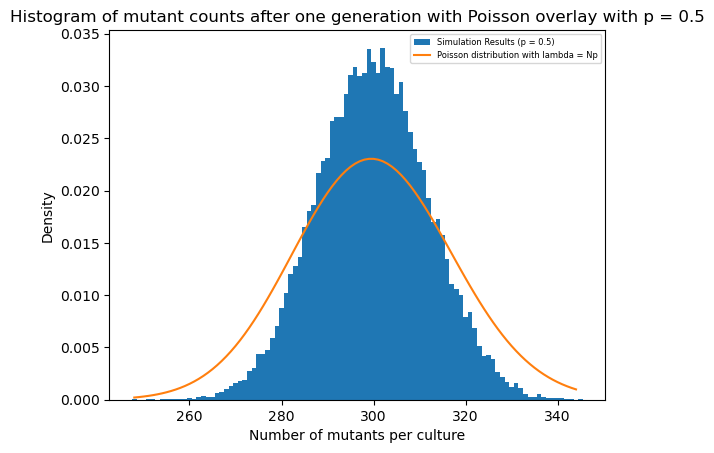

In [3]:
np.random.seed(515)

C = 20000 # 20,000 cultures
N = 600   # 600 initial cells
p = 0.5   # 0.5 prob of mutating 

def sim_single_gen_mutants(p, N, C):
    mutants = single_gen_mutants(p, N, C)
    
    sim_mean = np.mean(mutants)
    sim_var = np.var(mutants)

    print(f"Mean : {sim_mean:.2f} Variance: {sim_var:.2f} with mutation rate {p}.")
    
    counts, bins, _ = plt.hist(
        mutants, 
        bins = np.arange(mutants.min()-0.5, mutants.max()+1.5, 1), 
        density = True, 
        label = f"Simulation Results (p = {p})"
    )

    l = N*p # lambda = N*p
    x_vals = np.arange(int(mutants.min()), int(mutants.max()))

    plt.plot(
        x_vals,
        poisson.pmf(x_vals, mu = l),
        label = "Poisson distribution with lambda = Np"
    )
    plt.legend(fontsize = 6)
    plt.xlabel("Number of mutants per culture")
    plt.ylabel("Density")
    plt.title(f"Histogram of mutant counts after one generation with Poisson overlay with p = {p}")
    plt.show()

# run sim 
Cm = sim_single_gen_mutants(p, N, C)

**The mean (~ 300) is twice as high as the variance (~ 150) of the data. The Poisson distribution, with  λ = NP = 300 has variance equal to the mean, does not seem to accurately represent the process of mutation after a single generation. This can be seen in the plot which displays how the overalyed Poisson distribution is broader than the simulation distribution.**

**e)** 

Mean : 150.15 Variance: 110.66 with mutation rate 0.25.


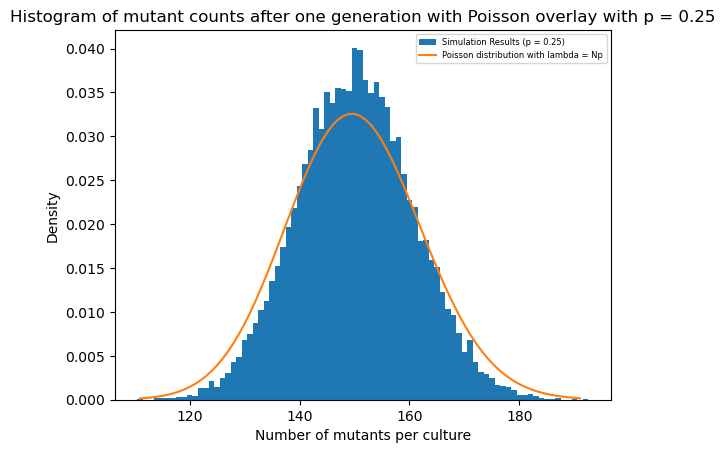

Mean : 60.01 Variance: 54.19 with mutation rate 0.1.


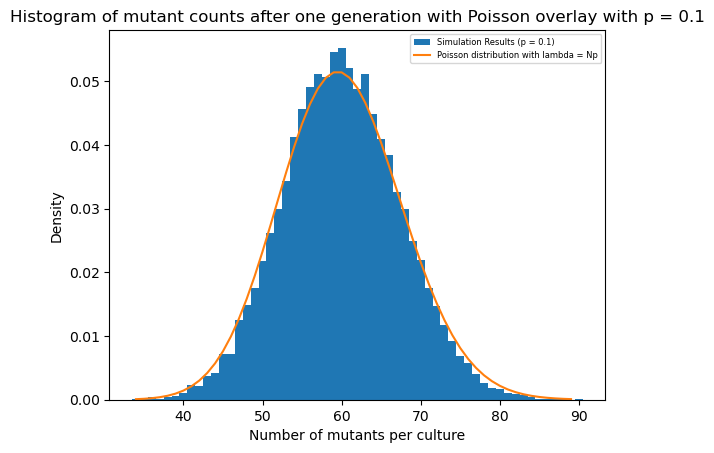

Mean : 12.04 Variance: 11.59 with mutation rate 0.02.


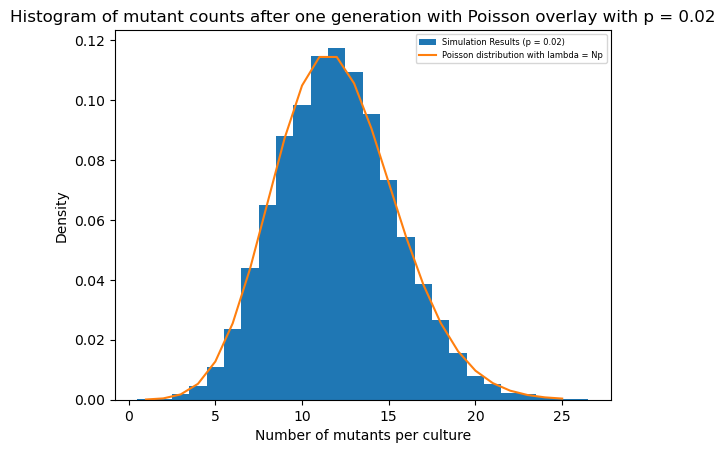

In [4]:
Cm_25 = sim_single_gen_mutants(0.25, N, C)
Cm_10 = sim_single_gen_mutants(0.10, N, C)
Cm_02 = sim_single_gen_mutants(0.02, N, C)

**As the mutation rate decreases, the variances decreases and approaches the mean, improving the accuracy of the Poisson approximation. Given that a more reasonable cellular mutation rate is on the order of $10^{-8}$, a Poisson distribution with parameter Np could accurately approximate the process of mutations occurring after a generation.**

**Problem 2. The Luria-Delbruck experiment.**

a) 

In [20]:
# mutation rate p, initial # cells N, # of cultures C, # of generations G)
def luria_delbruck(p, N, C, G):   
    mutants = np.zeros(C, dtype=int)
    # each culture starts with N non-resistant cells
    non_res = np.full(C, N, dtype=int) 
    # for each generation
    for g in range(G):
        lmbda = p * non_res
        new_mutants = poisson.rvs(lmbda)
        # update total number of mutants by doubling mutants from previous 
        # generation and adding newly mutated cells
        mutants = 2*mutants + new_mutants
        non_res = 2*non_res - new_mutants 
    return mutants

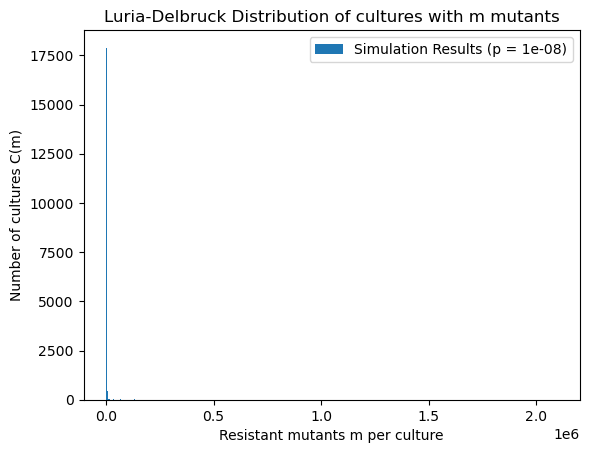

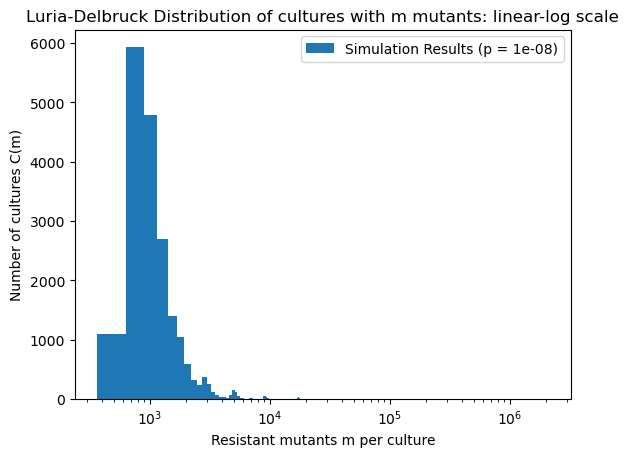

Mean : 2.18e+03 Variance: 3.73e+08


In [21]:
# run simulation for C = 20,000; N = 600; p = 10-8 ; G = 25
C, N, p, G = 20000, 600, 10**-8, 25

Cm_ld = luria_delbruck(p, N, C, G)

# plot lin-lin relationship
plt.hist(
        Cm_ld, 
        bins = 1000, 
        label = f"Simulation Results (p = {p})"
    )
plt.xlabel("Resistant mutants m per culture")
plt.ylabel("Number of cultures C(m)")
plt.title("Luria-Delbruck Distribution of cultures with m mutants")
plt.legend()
plt.show()

# plot lin-log relationship
plt.hist(
        Cm_ld, 
        bins = 8000, 
        label = f"Simulation Results (p = {p})"
    )
plt.xlabel('Resistant mutants m per culture')
plt.ylabel('Number of cultures C(m)')
plt.xscale('log')
plt.title("Luria-Delbruck Distribution of cultures with m mutants: linear-log scale")
plt.legend()
plt.show()

ld_mean = np.mean(Cm_ld)
ld_var = np.var(Cm_ld)

print(f"Mean : {ld_mean:.2e} Variance: {ld_var:.2e}")

**Most cultures have little mutants, while a few jackpots dominate. The variance is orders of magnitude larger than the mean, unlike the Poisson case**

**For each generation, N is the non-resistant population, that still has probability p of mutating and becoming resistant. λ, the non-resistant population at generation g times the mutation rate (N*p), represents the expected value of mutant cells each generation. As we are using a Poisson distribution, λ represents the mean and variance of the number of new mutants at each generation.**

**We can check that the nonmutant and mutant population are being correctly updated every generation by ensuring that the sum of the non-mutant and mutant population equals the total number of cells in the culture, doubling at each generation (g) starting from $N_{initial} = 600$:**

$nonmutant(g) + mutant(g) = N_{initial} * 2^{g}$

b) 

Replicate 1: Mean = 2.16e+03; Variance = 5.15e+08
Replicate 2: Mean = 2.31e+03; Variance = 1.08e+09
Replicate 3: Mean = 2.48e+03; Variance = 1.39e+09
Replicate 4: Mean = 3.38e+03; Variance = 8.61e+09
Replicate 5: Mean = 2.29e+03; Variance = 8.01e+08
Replicate 6: Mean = 2.58e+03; Variance = 3.89e+09
Replicate 7: Mean = 1.98e+03; Variance = 1.19e+08
Replicate 8: Mean = 2.08e+03; Variance = 1.79e+08
Replicate 9: Mean = 2.46e+03; Variance = 1.30e+09
Replicate 10: Mean = 2.30e+03; Variance = 1.10e+09


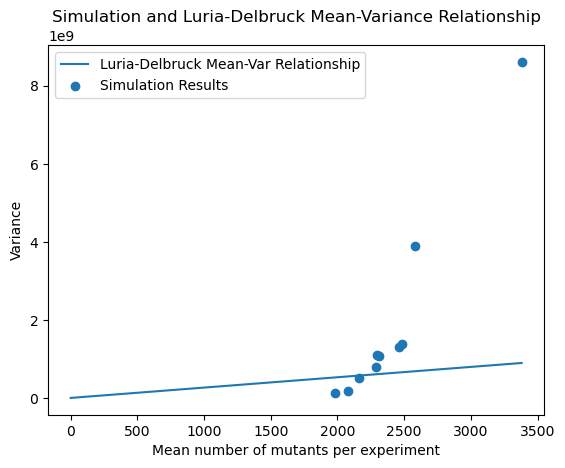

In [36]:
REPS = 10
ld_means = np.zeros(REPS, dtype = float)
ld_vars = np.zeros(REPS, dtype = float)

for i in range(REPS):
    Cm_ld_replicate = luria_delbruck(p, N, C, G)
    
    ld_means[i] = np.mean(Cm_ld_replicate)
    ld_vars[i] = np.var(Cm_ld_replicate)

# ld_var = (rNCp)/ln(NCp) 
# N = number of bacteria, p = mutation rate, C = number of cultures, 
# likely average of resistant bacteria r
r = np.linspace(0, ld_means.max(), 200) # proxy for mean resistant cells
Nt = N * (2**G) # number of bacteria at generation G
theoretical_var = r * (Nt * C * p)/(np.log(Nt * C * p)) 

for i in range(REPS): 
    print(f"Replicate {i+1}: Mean = {ld_means[i]:.2e}; Variance = {ld_vars[i]:.2e}")

plt.plot(r, theoretical_var, label = "Luria-Delbruck Mean-Var Relationship")
plt.scatter(ld_means, ld_vars, label = "Simulation Results")
plt.xlabel("Mean number of mutants per experiment")
plt.ylabel("Variance")
plt.title("Simulation and Luria-Delbruck Mean-Variance Relationship")
plt.legend()
plt.show()

**While the means are similar, there are a couple of replicates of the experiment that appear to be outliers, with very high variance. These are probably simulations in which a culture was a "jackpot", i.e. a culture with a mutant in an early generation, producing many mutant progeny and overwhelming the culture, which greatly affects the empirical variance for that simulation. With a high number of cultures, we get a good estimate of the overall distribution but the variance is sensitive to jackpots**

c)

In [37]:
# removes cultures with "jackpots" i.e. top 0.1% with most mutants
def remove_jackpots(Cm): 
    k = int(len(Cm)*0.001)        # number of cultures to drop
    sorted_Cm = np.sort(Cm)[::-1] # sort from most to least mutants 
    trimmed = sorted_Cm[k:]       # trim top 0.1% cultures
    return trimmed

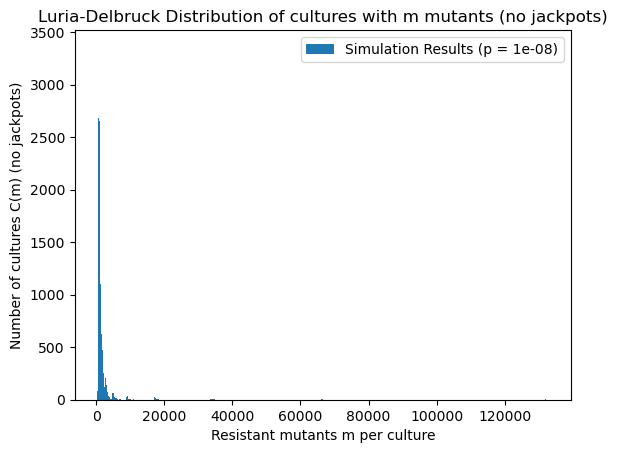

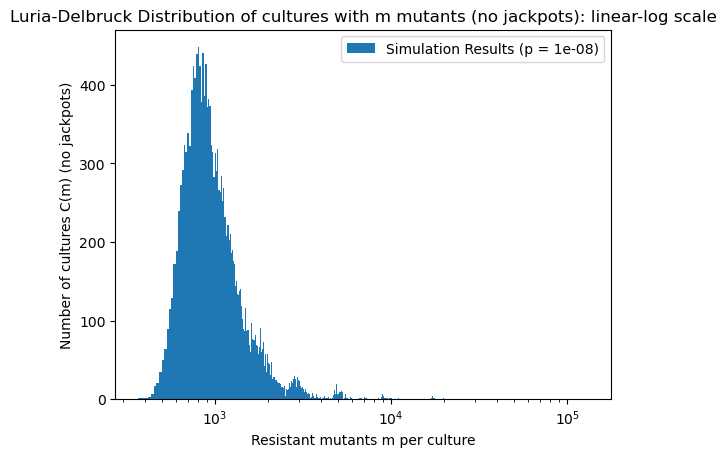

Replicate 1 without jackpots: Mean = 1.81e+03; Variance = 2.36e+07
Replicate 2 without jackpots: Mean = 1.80e+03; Variance = 2.25e+07
Replicate 3 without jackpots: Mean = 1.84e+03; Variance = 2.81e+07
Replicate 4 without jackpots: Mean = 1.77e+03; Variance = 2.11e+07
Replicate 5 without jackpots: Mean = 1.80e+03; Variance = 2.32e+07
Replicate 6 without jackpots: Mean = 1.74e+03; Variance = 1.80e+07
Replicate 7 without jackpots: Mean = 1.77e+03; Variance = 2.53e+07
Replicate 8 without jackpots: Mean = 1.79e+03; Variance = 1.92e+07
Replicate 9 without jackpots: Mean = 1.81e+03; Variance = 2.59e+07
Replicate 10 without jackpots: Mean = 1.75e+03; Variance = 1.96e+07


In [38]:
Cm_no_jackpots = remove_jackpots(Cm_ld)

# plot lin-lin scale
plt.hist(
        Cm_no_jackpots, 
        bins = 1000, 
        label = f"Simulation Results (p = {p})"
    )
plt.xlabel("Resistant mutants m per culture")
plt.ylabel("Number of cultures C(m) (no jackpots)")
plt.title("Luria-Delbruck Distribution of cultures with m mutants (no jackpots)")
plt.legend()
plt.show()

# plot lin-log scale
plt.hist(
        Cm_no_jackpots, 
        bins = 8000, 
        label = f"Simulation Results (p = {p})"
    )
plt.xlabel('Resistant mutants m per culture')
plt.ylabel('Number of cultures C(m) (no jackpots)')
plt.xscale('log')
plt.title("Luria-Delbruck Distribution of cultures with m mutants (no jackpots): linear-log scale")
plt.legend()
plt.show()

# Run 10 replicates of the simulation and report mean and variance values. 
REPS = 10
ld_means = np.zeros(REPS, dtype = float)
ld_vars = np.zeros(REPS, dtype = float)

for i in range(REPS):
    Cm_ld_rep_no_jackpots = remove_jackpots(luria_delbruck(p, N, C, G))
    
    ld_means[i] = np.mean(Cm_ld_rep_no_jackpots)
    ld_vars[i] = np.var(Cm_ld_rep_no_jackpots)

for i in range(REPS): 
    print(f"Replicate {i+1} without jackpots: Mean = {ld_means[i]:.2e}; Variance = {ld_vars[i]:.2e}")

**Without jackpots, the mean values are very similar and all variance values decrease to the same order of magnitude. Removing the jackpots resolved the outliers among the simulations, improving the variance between simulations.**

**d)** 

Sample size n = 2.01e+10
Probability pm of drawing a mutant from the big flask: 1.25e-07.


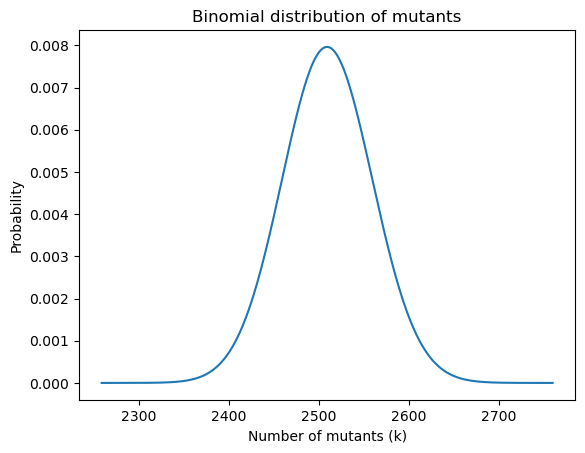

Binomial mean = 2509.855; Binomial variance = 2509.854
Mean from LD experiment (part a) : 2180.854 Variance: 3.73e+08


In [42]:
NC = N*C # cells in one flask
N_fin_bigflask = NC * (2**G) # final population in big flask

def big_flask(NC, G, p, runs):
    # store over iterations of big flask simulation
    non_res_arr = np.zeros(runs, dtype=np.int64)
    mutants_arr = np.zeros(runs, dtype=np.int64)
    for i in range(runs): 
        non_res, mutants = NC, 0
        for _ in range(G):
            lmbda = p * non_res
            new_mutants = poisson.rvs(lmbda)
            # update total number of mutants by doubling mutants from 
            # previous generation and adding newly mutated cells
            mutants = 2*mutants + new_mutants
            non_res = 2*non_res - new_mutants 
        non_res_arr[i] = non_res
        mutants_arr[i] = mutants
    return non_res_arr, mutants_arr

# run 500 iterations of big flask simulation and store mutant and 
# non-resistant populations for each simulation
big_non_res, big_mutants = big_flask(NC, G, p, runs=500)

# probabilities pm of drawing a mutant from the big flask 
pm = big_mutants/(big_non_res + big_mutants) 
pm_mean = np.mean(pm) # avg prob drawn from many iterations of experiment
n = N * (2**G) # sample of n cells = final culture pop in LD experiment

print(f"Sample size n = {n:.2e}")
print(f"Probability pm of drawing a mutant from the big flask: {pm_mean:.2e}.")

# Binomial distribution from sampling with replacement
# Binomial mean = np ; variance = np(1-p)
bino_mean = n * pm_mean
bino_var = n * pm_mean * (1 - pm_mean)

# range of integers 5 stdevs above and below the mean
x_vals = np.arange(int(bino_mean - 5 * np.sqrt(bino_var)),
                   int(bino_mean + 5 * np.sqrt(bino_var)) + 1)

# (k_successes, n_trials, p_probability)
bino_pmf = binom.pmf(x_vals, n, pm_mean)

plt.plot(x_vals, bino_pmf)
plt.xlabel("Number of mutants (k)")
plt.ylabel("Probability")
plt.title("Binomial distribution of mutants")
plt.show()

print(f"Binomial mean = {bino_mean:.3f}; Binomial variance = {bino_var:.3f}")
print(f"Mean from LD experiment (part a) : {ld_mean:.3f} Variance: {ld_var:.2e}")

**While the means are similar, the variance from the Luria-Delbruck experiment is much greater. Sampling from one big flask where NC cells grow together gives a binomial distribution with parameter pm equal to the mutant fraction in the flask. This distribution has mean~variance, unlike the Luria-Delbruck experiment which generates long tail with similar mean but very high variance due to the possibility of jackpots.**
